# 06-post-analysis

How can we verify if the trained models are correct in their predictions? 

One way is to verify against known candidates. 

In [1]:
import sys
sys.path.insert(0, "../")

import pandas as pd
from pathlib import Path
from src.visualization import visualize

data_dir = Path.cwd().parent.parent.parent / "data"
models_dir = Path.cwd().parent.parent.parent / "models" 

print("Current data directory {}".format(data_dir))

# Optional: Load the "autoreload" extension so that code can change
%load_ext autoreload

#OPTIONAL: Always reload modules so that as you change code in src, it gets loaded
%autoreload 2

Current data directory /Users/oliverhebnes/Documents/predicting-solid-state-qubit-material-hosts/data


In [2]:
known_candidates = ["SiC","SiGe", "C", "Si",
                         "GaN", "GaAs", "AlN", "ZnS", "ZnSe", "ZnO",
                         "AlP", "GaP", "AlAs", "ZnTe", "CdS"
                    ]
QD_2D_candidates = ["BN", "MoS2", "WSe2", "WS2",#2D
                    "InAs" #QD
                   ] 

In [3]:
title = "Empirical summary"
InsertApproach = "03-empirical-approach"
numberOfPrincipalComponents = 176

## Training set

In [4]:
trainingSet   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingData.pkl")
trainingTarget   = pd.read_pickle(data_dir / InsertApproach / "processed" / "trainingTarget.pkl")
trainingSet["candidate"] = trainingTarget

In [5]:
trainingSet

,material_id,full_formula,AtomicOrbitals|HOMO_character,AtomicOrbitals|HOMO_element,AtomicOrbitals|HOMO_energy,AtomicOrbitals|LUMO_character,AtomicOrbitals|LUMO_element,AtomicOrbitals|LUMO_energy,AtomicPackingEfficiency|dist from 1 clusters |APE| < 0.010,AtomicPackingEfficiency|dist from 3 clusters |APE| < 0.010,...,AFLOWML|ml_agl_heat_capacity_Cv_300K_per_atom,AFLOWML|ml_agl_thermal_conductivity_300K,AFLOWML|ml_agl_thermal_expansion_300K,MP|spacegroup.number,MP|total_magnetization,MP|efermi,MP|Eg,AFLOWML|Eg,MP|Polar SG,candidate
0,mp-24,C8,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.634,3.043,0.000086,206,0.000000,9.783159,2.7785,3.355,0,1.0
1,mp-47,C4,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.588,3.223,0.000086,194,0.000000,9.983070,3.3395,3.166,0,1.0
2,mp-66,C2,2.0,6,-0.199186,2.0,6,-0.199186,1.000000,1.000000,...,0.617,4.279,0.000086,227,0.000000,9.614764,4.3387,3.593,0,1.0
3,mp-149,Si2,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,2.577,3.417,0.000061,227,0.000000,5.564646,0.8527,0.742,0,1.0
4,mp-165,Si4,2.0,14,-0.153293,2.0,14,-0.153293,1.000000,1.000000,...,2.549,3.443,0.000061,194,0.000000,5.891539,0.5139,0.667,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,mp-1275839,Co4Bi24S8O64,3.0,27,-0.322368,3.0,27,-0.322368,0.034641,0.052087,...,2.709,2.690,0.000052,3,0.000351,3.917413,2.3186,2.156,1,0.0
586,mp-1291058,Sr4Mn2Mo2O12,3.0,25,-0.266540,3.0,25,-0.266540,0.052116,0.058661,...,2.515,2.749,0.000060,1,0.992766,3.987258,0.8079,0.000,1,0.0
587,mp-1291630,Fe12O16,3.0,26,-0.295049,3.0,26,-0.295049,0.091832,0.135247,...,2.496,2.841,0.000060,5,6.504784,4.184540,0.1221,0.000,1,0.0
588,mp-1298346,Sr8Co4O16,3.0,27,-0.322368,3.0,27,-0.322368,0.057864,0.095274,...,2.654,2.725,0.000061,4,0.000485,2.323107,0.5907,0.000,1,0.0


In [6]:
#trainingSet[["full_formula", "pretty_formula", "candidate"]][trainingSet["pretty_formula"].isin(known_candidates)]

## Test set
How many entries in our test set consists of known candidates?

In [7]:
Summary = pd.read_pickle(models_dir / InsertApproach /  "summary" / Path("PCA-" + str(numberOfPrincipalComponents) + "-" + "summary.pkl"))
Summary = Summary.reset_index(drop=True)
Summary.shape

(24544, 11)

In [8]:
Summary[Summary["pretty_formula"].isin(known_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
15373,mp-630227,C60,C,1.0,0.778806,1.0,1.0,0.0,0.349925,1.0,0.837923
16130,mp-667273,C60,C,1.0,0.992246,0.0,0.0,1.0,0.606220,1.0,0.994849
16381,mp-680372,C60,C,1.0,0.761067,1.0,1.0,0.0,0.325475,1.0,0.840141
16456,mp-683919,C140,C,1.0,0.833887,1.0,1.0,0.0,0.361619,0.0,0.131179
21285,mp-1194362,C28,C,0.0,0.460855,1.0,1.0,0.0,0.419586,0.0,0.018162
22076,mp-1196583,C240,C,1.0,0.962119,0.0,0.0,0.0,0.368595,0.0,0.097529
24043,mp-1203645,C48,C,0.0,0.479805,1.0,1.0,0.0,0.489372,0.0,0.040057
24489,mp-1205417,C20,C,1.0,0.714762,1.0,1.0,0.0,0.377650,0.0,0.046767


In [9]:
Summary[Summary["pretty_formula"].isin(QD_2D_candidates)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
45,mp-344,B4N4,BN,1.0,0.545369,1.0,1.0,1.0,0.701941,1.0,0.811146
239,mp-1599,B4N4,BN,0.0,0.178088,1.0,1.0,0.0,0.263452,0.0,0.145607
242,mp-1639,B1N1,BN,1.0,0.996963,1.0,1.0,1.0,0.881510,1.0,0.999906
386,mp-2653,B2N2,BN,1.0,0.995312,0.0,0.0,1.0,0.776191,1.0,0.999061
3088,mp-13151,B4N4,BN,1.0,0.939073,0.0,0.0,1.0,0.725278,1.0,0.992772
5148,mp-20305,In1As1,InAs,1.0,0.998013,1.0,1.0,1.0,0.852749,1.0,0.999909
15769,mp-644751,B4N4,BN,1.0,0.906148,1.0,1.0,1.0,0.511407,1.0,0.957099
19208,mp-1077506,B3N3,BN,0.0,0.484399,0.0,0.0,0.0,0.488820,0.0,0.162010


## How many entries does the models agree on? 

In [10]:
RF_DT_GB_LOG = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1) & 
                       (Summary["LOG "] == 1)]

RF_DT_GB_LOG.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB_LOG.csv")
RF_DT_GB_LOG

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.978347,1.0,1.0,1.0,0.583934,1.0,0.998227
2,mp-14,Se3,Se,1.0,0.996969,1.0,1.0,1.0,0.747606,1.0,0.999798
3,mp-19,Te3,Te,1.0,0.995230,1.0,1.0,1.0,0.720981,1.0,0.999888
4,mp-25,N8,N2,1.0,0.977147,1.0,1.0,1.0,0.596804,1.0,0.957901
8,mp-111,Ne1,Ne,1.0,0.999906,1.0,1.0,1.0,0.755679,1.0,0.999882
...,...,...,...,...,...,...,...,...,...,...,...
22031,mp-1196461,C156F84,C13F7,1.0,0.569745,1.0,1.0,1.0,0.613583,1.0,0.951376
22067,mp-1196569,Mg17Si20O60,Mg17(SiO3)20,1.0,0.936560,1.0,1.0,1.0,0.702011,1.0,0.998205
22497,mp-1198022,Ge34,Ge,1.0,0.989959,1.0,1.0,1.0,0.773515,1.0,0.999805
24113,mp-1203927,Mo8N4O30,Mo4N2O15,1.0,0.532854,1.0,1.0,1.0,0.676001,1.0,0.936733


In [11]:
Summary[(Summary["RF Prob"] > 0.8) & 
        (Summary["DT Prob"] > 0.8) & 
        (Summary["GB Prob"] > 0.8) & 
        (Summary["LOG Prob"] > 0.8)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
10,mp-137,Ge12,Ge,1.0,0.984399,1.0,1.0,1.0,0.820225,1.0,0.999224
58,mp-406,Cd1Te1,CdTe,1.0,0.996856,1.0,1.0,1.0,0.810443,1.0,0.998180
119,mp-820,Hg1Se1,HgSe,1.0,0.990593,1.0,1.0,1.0,0.810698,1.0,0.999414
148,mp-1039,Mg2Te2,MgTe,1.0,0.963051,1.0,1.0,1.0,0.807211,1.0,0.998426
152,mp-1070,Cd2Se2,CdSe,1.0,0.988322,1.0,1.0,1.0,0.940534,1.0,0.999909
166,mp-1156,Ga1Sb1,GaSb,1.0,0.996969,1.0,1.0,1.0,0.841507,1.0,0.999909
241,mp-1634,Mo2Se4,MoSe2,1.0,0.957531,1.0,1.0,1.0,0.828817,1.0,0.993235
242,mp-1639,B1N1,BN,1.0,0.996963,1.0,1.0,1.0,0.881510,1.0,0.999906
279,mp-1876,Sn1S1,SnS,1.0,0.949432,1.0,1.0,1.0,0.802371,1.0,0.999501
281,mp-1883,Sn1Te1,SnTe,1.0,0.985865,1.0,1.0,1.0,0.801184,1.0,0.997375


In [12]:
RF_DT_GB = Summary[(Summary["RF "] == 1) & 
                       (Summary["DT "] == 1) & 
                       (Summary["GB "] == 1)]

RF_DT_GB.to_csv(models_dir / InsertApproach / "summary" / "RF_DT_GB.csv")
RF_DT_GB

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.978347,1.0,1.0,1.0,0.583934,1.0,0.998227
2,mp-14,Se3,Se,1.0,0.996969,1.0,1.0,1.0,0.747606,1.0,0.999798
3,mp-19,Te3,Te,1.0,0.995230,1.0,1.0,1.0,0.720981,1.0,0.999888
4,mp-25,N8,N2,1.0,0.977147,1.0,1.0,1.0,0.596804,1.0,0.957901
8,mp-111,Ne1,Ne,1.0,0.999906,1.0,1.0,1.0,0.755679,1.0,0.999882
...,...,...,...,...,...,...,...,...,...,...,...
22939,mp-1199624,Ba16Na8Nb40O120,Ba2NaNb5O15,0.0,0.199765,1.0,1.0,1.0,0.652657,1.0,0.999729
24113,mp-1203927,Mo8N4O30,Mo4N2O15,1.0,0.532854,1.0,1.0,1.0,0.676001,1.0,0.936733
24147,mp-1204057,Si72O144,SiO2,1.0,0.993799,1.0,1.0,1.0,0.746156,1.0,0.999776
24186,mp-1204230,Sr64Ga32O112,Sr4Ga2O7,0.0,0.017915,1.0,1.0,1.0,0.682370,1.0,0.998106


In [13]:
Summary[(Summary["RF Prob"] > 0.75) & 
        (Summary["DT Prob"] > 0.75) & 
        (Summary["GB Prob"] > 0.75)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
8,mp-111,Ne1,Ne,1.0,0.999906,1.0,1.0,1.0,0.755679,1.0,0.999882
10,mp-137,Ge12,Ge,1.0,0.984399,1.0,1.0,1.0,0.820225,1.0,0.999224
34,mp-286,Yb1Se1,YbSe,1.0,0.710996,1.0,1.0,1.0,0.809138,1.0,0.998406
58,mp-406,Cd1Te1,CdTe,1.0,0.996856,1.0,1.0,1.0,0.810443,1.0,0.998180
119,mp-820,Hg1Se1,HgSe,1.0,0.990593,1.0,1.0,1.0,0.810698,1.0,0.999414
...,...,...,...,...,...,...,...,...,...,...,...
19145,mp-1067619,Ge4,Ge,1.0,0.998346,1.0,1.0,1.0,0.766923,1.0,0.999890
19193,mp-1072429,Ga4Ru2,Ga2Ru,1.0,0.974413,1.0,1.0,1.0,0.771691,1.0,0.999902
19281,mp-1078597,Zn1Cd3Se4,ZnCd3Se4,1.0,0.961226,1.0,1.0,1.0,0.856915,1.0,0.999878
19358,mp-1079201,B2C4N2,BC2N,1.0,0.976994,1.0,1.0,1.0,0.805965,1.0,0.996854


In [14]:
Summary[(Summary["RF "] == 1) &  
        (Summary["GB "] == 1)]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.978347,1.0,1.0,1.0,0.583934,1.0,0.998227
2,mp-14,Se3,Se,1.0,0.996969,1.0,1.0,1.0,0.747606,1.0,0.999798
3,mp-19,Te3,Te,1.0,0.995230,1.0,1.0,1.0,0.720981,1.0,0.999888
4,mp-25,N8,N2,1.0,0.977147,1.0,1.0,1.0,0.596804,1.0,0.957901
8,mp-111,Ne1,Ne,1.0,0.999906,1.0,1.0,1.0,0.755679,1.0,0.999882
...,...,...,...,...,...,...,...,...,...,...,...
22939,mp-1199624,Ba16Na8Nb40O120,Ba2NaNb5O15,0.0,0.199765,1.0,1.0,1.0,0.652657,1.0,0.999729
24113,mp-1203927,Mo8N4O30,Mo4N2O15,1.0,0.532854,1.0,1.0,1.0,0.676001,1.0,0.936733
24147,mp-1204057,Si72O144,SiO2,1.0,0.993799,1.0,1.0,1.0,0.746156,1.0,0.999776
24186,mp-1204230,Sr64Ga32O112,Sr4Ga2O7,0.0,0.017915,1.0,1.0,1.0,0.682370,1.0,0.998106


In [15]:
Summary[Summary["LOG "]==1]

,material_id,full_formula,pretty_formula,LOG,LOG Prob,DT,DT Prob,RF,RF Prob,GB,GB Prob
1,mp-7,S6,S,1.0,0.978347,1.0,1.0,1.0,0.583934,1.0,0.998227
2,mp-14,Se3,Se,1.0,0.996969,1.0,1.0,1.0,0.747606,1.0,0.999798
3,mp-19,Te3,Te,1.0,0.995230,1.0,1.0,1.0,0.720981,1.0,0.999888
4,mp-25,N8,N2,1.0,0.977147,1.0,1.0,1.0,0.596804,1.0,0.957901
5,mp-77,S32,S,1.0,0.907468,0.0,0.0,0.0,0.371349,1.0,0.978307
...,...,...,...,...,...,...,...,...,...,...,...
23632,mp-1202132,Sr5Ti7O19,Sr5Ti7O19,1.0,1.000000,0.0,0.0,1.0,0.538529,0.0,0.031775
24075,mp-1203760,Si28Tc16,Si7Tc4,1.0,0.838841,1.0,1.0,0.0,0.483934,1.0,0.751266
24113,mp-1203927,Mo8N4O30,Mo4N2O15,1.0,0.532854,1.0,1.0,1.0,0.676001,1.0,0.936733
24147,mp-1204057,Si72O144,SiO2,1.0,0.993799,1.0,1.0,1.0,0.746156,1.0,0.999776


In [16]:
generatedData = pd.read_pickle(data_dir / "interim" / "featurized" / "featurized-11-04-2021.pkl")
generatedData = generatedData[~generatedData["material_id"].isin(trainingSet["material_id"])].reset_index(drop=True)

findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


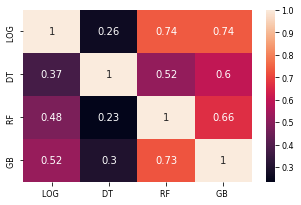

[1.0, 0.2623224728487886, 0.1921470342522974, 0.17878028404344193, 0.29741019214703424, 0.23391812865497075, 0.662751677852349, 1.0, 1.0, 0.5213776722090261, 0.4750593824228028]


,LOG LOG LOG LOG,LOG LOG LOG DT,LOG LOG RF DT,LOG RF GB DT,DT GB DT DT,DT RF DT DT,RF RF GB GB,RF RF RF RF,GB GB GB GB,GB LOG LOG LOG,RF LOG LOG LOG
LOG LOG LOG LOG,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
LOG LOG LOG DT,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
LOG LOG RF DT,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
LOG RF GB DT,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
DT GB DT DT,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
DT RF DT DT,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
RF RF GB GB,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
RF RF RF RF,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
GB GB GB GB,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059
GB LOG LOG LOG,1.0,0.262322,0.192147,0.17878,0.29741,0.233918,0.662752,1.0,1.0,0.521378,0.475059


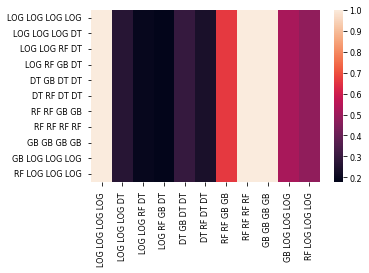

In [17]:
visualize.visualize_heatmap_of_combinations(Summary)

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2321.72it/s]
findfont: Font family ['Palatino Linotype'] not found. Falling back to DejaVu Sans.


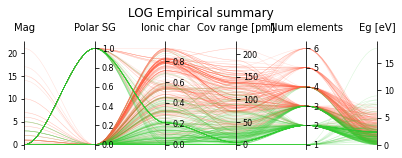

250


100%|████████████████████████████████████████| 500/500 [00:00<00:00, 833.43it/s]


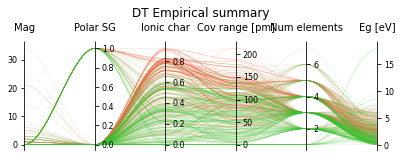

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1751.49it/s]


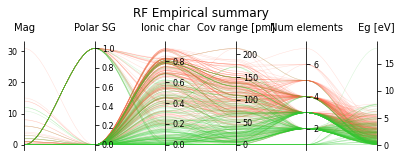

250


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1894.64it/s]


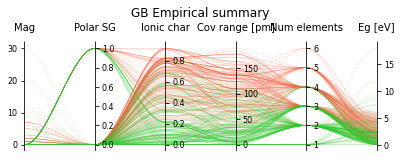

In [18]:
Summary = Summary[Summary["material_id"].isin(generatedData.material_id)].reset_index(drop=True)
generatedData = generatedData[generatedData["material_id"].isin(Summary.material_id)].reset_index(drop=True)
abbreviations = ["LOG ", "DT ", "RF ", "GB "]
for i in range(len(abbreviations)):
    generatedData["candidate"] = Summary[abbreviations[i]]
    visualize.make_parallel_coordinate_matplot(generatedData[Summary[abbreviations[i]]!=-1], InsertApproach+str(abbreviations[i]), title=str(abbreviations[i]) + "" + title, applyLegend=False)